
# <h1 style='background:#F08080; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>HEART FAILURE PREDICTION</center></h1>

<center><img src = "https://d112y698adiu2z.cloudfront.net/photos/production/software_photos/001/731/418/datas/original.jpg" width = 150 height = 150/></center>

Cardiovascular diseases (CVDs) are the number major cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

You are assinged to build a model using neural networks for early detection and management of cardiovascular diseases.


<h1 style='background:#F08080; border:2; border-radius: 10px; color:black'><center>Import Dependancies</center></h1>

*   Import dependancies for performing linear algebra,data processing and data visualization.

In [ ]:
# 1. import dependancies
import tensorflow as tf
import numpy as np #imported numpy for matrix algebra
import pandas as pd #imported pandas for data representation
import matplotlib.pyplot as plt #imported matplotlib to plot data
from sklearn.preprocessing import StandardScaler      #imported scikit-learn data preprocessing Standard Scalar
from sklearn.model_selection import train_test_split #imported scikit-learn train data test data split function
from sklearn.metrics import accuracy_score     #imported evaluation parameters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow import keras      #imported keras to create neural network model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

<h1 style='background:#F08080; border:2; border-radius: 10px; color:black'><center>Loading Data</center></h1>

*   Load the csv file, heart_failure_clinical_records_dataset.csv which contains data

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#FFFFF0;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>About the data (Description of attributes)</center></h2>  
    
* **age:** Age of the patient
* **anaemia:** Haemoglobin level of patient (Boolean)
* **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
* **diabetes:** If the patient has diabetes (Boolean)
* **ejection_fraction:** Percentage of blood leaving the heart at each contraction
* **high_blood_pressure:** If the patient has hypertension (Boolean)
* **platelets:** Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (mEq/L)
* **sex:** Sex of the patient
* **smoking:** If the patient smokes or not (Boolean)
* **time:** Follow-up period (days)
* **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)

**[Attributes having Boolean values:** 0 = Negative (No); 1 = Positive (Yes)]

In [ ]:
# Upload json which contains API token
from google.colab import files              #imported kaggle json file

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vibhookannangara","key":"7e35d0823e8d55c09540042fbfe1ae4a"}'}

In [ ]:


# copy the keggle.json to folder create
!cp kaggle.json ~/.kaggle/

# permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data --force          #downloaded kaggle heart-failure dataset



  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 4.46MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/heart-failure-clinical-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')     #extracted dataset

The dataset is extracted


In [ ]:
# 2. loading data
df =  pd.read_csv(r"/content/heart_failure_clinical_records_dataset.csv")      #created a pandas dataframe from the dataset

<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Analyzing Data</center></h1>

*   Display first five rows of dataset
*   Describe the dataset doing Univariate Analysis for statistical description and understanding of dispersion of data
*   Print information about the DataFrame including the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)


In [ ]:
# 3. display first five rows of dataset
print(df.head(5))         #displayed first 5 data of the pandas dataframe

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [ ]:
# 4. describe the dataset doing Univariate Analysis for statistical description
print(df.describe())                                #statistical parameters for each column of the dataframe

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [ ]:
# 5. print information about the DataFrame
print(df.dtypes)             #I looked at all the datatypes of the dataframe columns

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Data Preprocessing</center></h1>

*   Handle missing values if there any
*   Defining independent and dependent attributes ( features and targets)
*   Setting up a standard scaler for the feattaures and analyzing it thereafter
*   Split variables into training and test sets such that when you execute your code the result would be the same eachtime. Allocat 70% of data into training set.

In [ ]:
# 6. handle missing values
print(df.isna().sum())           #checked whether threre are missing values in rows

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
# 7. defining independent and dependent attributes in training and test sets
X = df.drop('DEATH_EVENT', axis=1) # Defined as independent variable
y = df['DEATH_EVENT'] # Defined as independent variables

In [ ]:
# 8. setting up a standard scaler for the features and analyzing it thereafter
sc = StandardScaler()        #I used scikit learn scaler to scale the inputs and outputs

In [ ]:
# 9. spliting variables into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #split the dataset to 70/30
X_train = sc.fit_transform(X_train)         #scaled the data
X_test = sc.transform(X_test)

<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Identify Problem Type</center></h1>

*   Explain which type of problem type is this?

**`# 10. TYPE YOUR ANSWER HERE`**

> Data Classification Problem



<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Model Building</center></h1>

*   Initialize the neural network
*   Add input layer and define input dimentions
*   Add two hidden layers and define suitable activation functions for each
*   Add output layer and define suitable activation function and define number of neurons correctly
*   Model should not be overfit

In [ ]:
# 11. Initialising the NN
classifier = Sequential()

# 12. layers
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

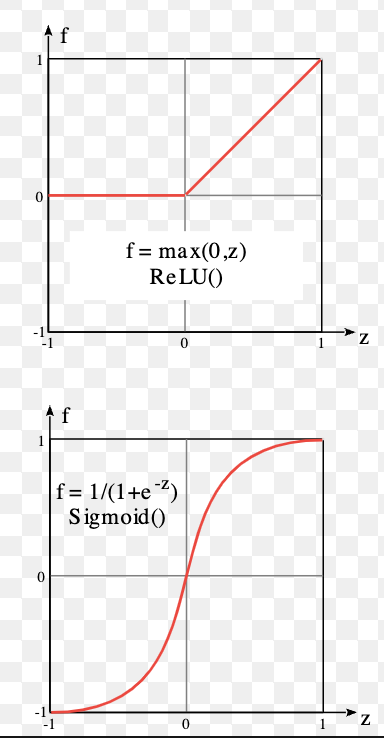

<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Compile the Model</center></h1>

*   Compile the model with adam optimizer
*   Choose correct loss function baesd on problem type
*   Define performance metrics baesd on problem type

In [ ]:
# 13. Compiling the ANN
classifier.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics= tf.keras.metrics.BinaryAccuracy())
#compiled neural network using adam optimizer and binary crossentropy loss estimator

<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Train the Model</center></h1>

*   Choose batch size as 25
*   Choose epochs to 80
*   Use 25% of training data as validation data

In [ ]:
# 14. Train the ANN
history = classifier.fit(X_train, y_train, batch_size=25, validation_split=0.25, epochs=80)
#validation set split as 25%

Epoch 1/80
7/7 [==============================] - 1s 22ms/step - loss: 0.3914 - binary_accuracy: 0.7821 - val_loss: 0.5992 - val_binary_accuracy: 0.7547
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 0.3879 - binary_accuracy: 0.7821 - val_loss: 0.5943 - val_binary_accuracy: 0.7547
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.3856 - binary_accuracy: 0.7949 - val_loss: 0.5906 - val_binary_accuracy: 0.7547
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.3833 - binary_accuracy: 0.8077 - val_loss: 0.5873 - val_binary_accuracy: 0.7547
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3807 - binary_accuracy: 0.8141 - val_loss: 0.5857 - val_binary_accuracy: 0.7547
Epoch 6/80
7/7 [==============================] - 0s 10ms/step - loss: 0.3782 - binary_accuracy: 0.8269 - val_loss: 0.5827 - val_binary_accuracy: 0.7547
Epoch 7/80
7/7 [==============================] - 0s 6ms/step - loss: 0.3759 - binary_

<h1 style='background:#F08080; border:0; border-radius: 10px; color:black'><center>Model Evaluation</center></h1>

*   Print the validation accuracy
*   Plot training and validation losses in the same plot
*   Plot metrics performance on both training and validation in the same plot
*   Predict the results for the test set
*   Evaluate results (Hint: Use metrices based on problem type)

In [ ]:
# 15. validation accuracy
history.history['val_binary_accuracy']

[0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7358490824699402,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7547169923782349,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022865295,
 0.7735849022

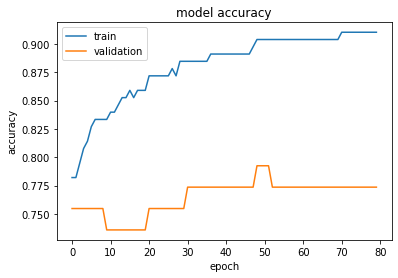

In [ ]:
# 16. plot training and validation losses in the same plot
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.show()


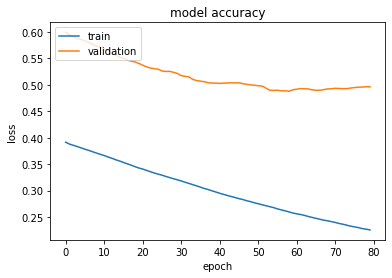

In [ ]:
# 17. plot metrics performance on both training and validation in the same plot


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# 18. Predicting the test set results
y_pred = classifier.predict(X_test)
#Define the threshold
threshold=0.5

y_pred = y_pred >= threshold

cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred,y_test)
print(cm, score)

3/3 [==============================] - 0s 4ms/step
[[47  6]
 [20 17]] 0.7111111111111111


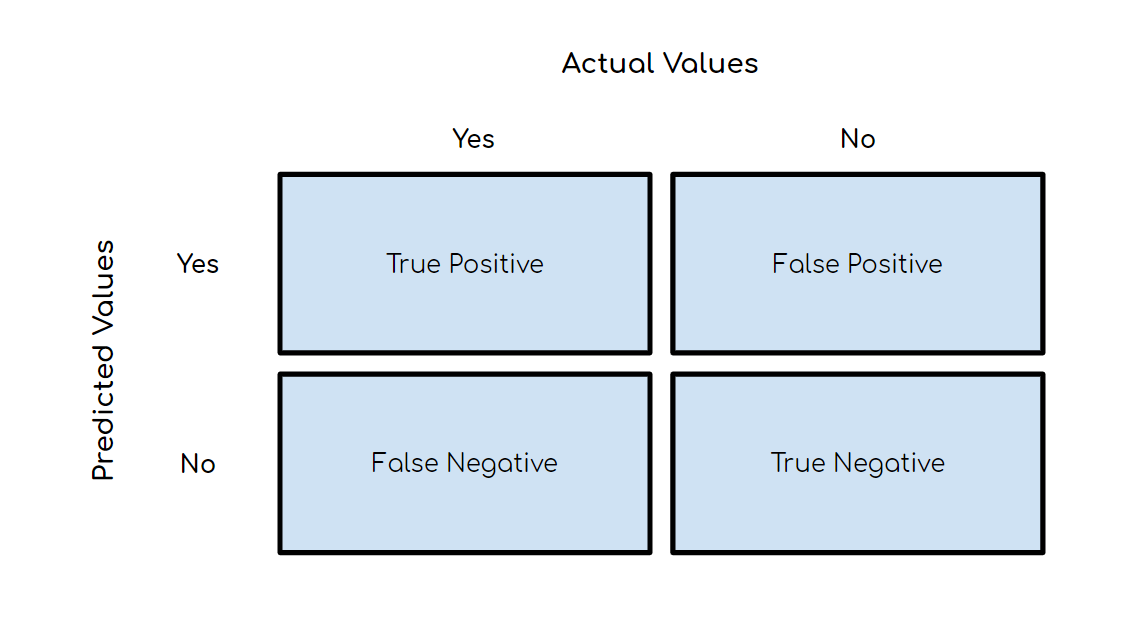

In [ ]:
# 19. evaluate results (Hint: Use metrices based on problem type)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        53
           1       0.74      0.46      0.57        37

    accuracy                           0.71        90
   macro avg       0.72      0.67      0.68        90
weighted avg       0.72      0.71      0.69        90

